**Car_Price_Prediction
 **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
# Load Data
data = pd.read_csv("/content/CarPrice_Assignment.csv")
data.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [ ]:
data.shape

(205, 26)

In [ ]:
data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19     

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# Check Missing Values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])
data['doornumber']=labelencoder.fit_transform(data['doornumber'])


In [ ]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


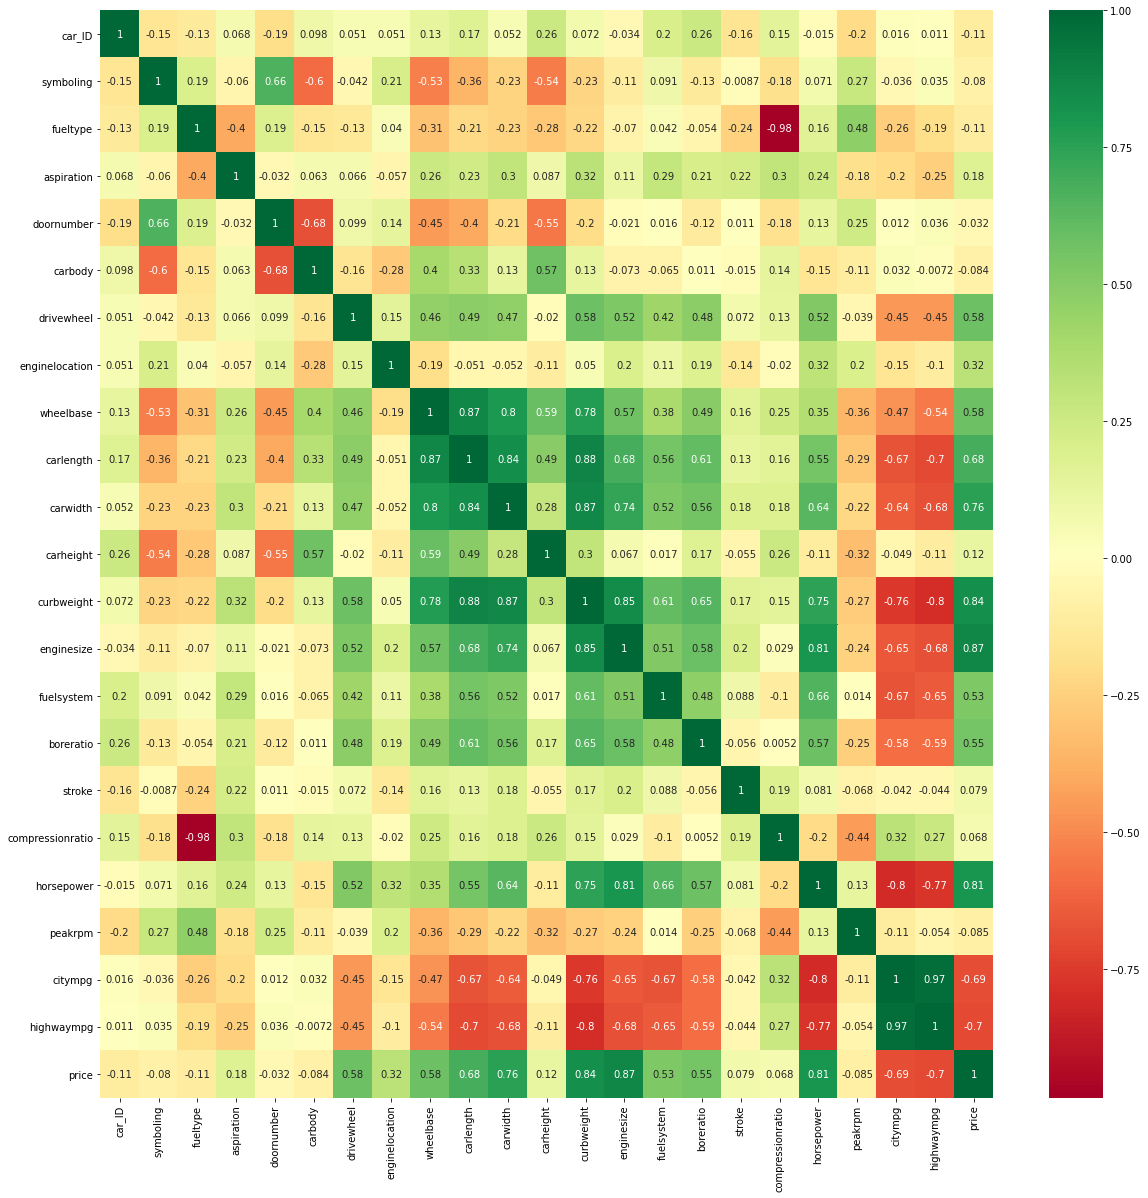

In [ ]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
data1=data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','price','enginelocation']]
data1.head(4)

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horsepower      205 non-null    int64  
 1   boreratio       205 non-null    float64
 2   enginesize      205 non-null    int64  
 3   curbweight      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   carlength       205 non-null    float64
 6   wheelbase       205 non-null    float64
 7   drivewheel      205 non-null    int64  
 8   price           205 non-null    float64
 9   enginelocation  205 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


In [ ]:
data1.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,104.117073,3.329756,126.907317,2555.565854,65.907805,174.049268,98.756585,1.326829,13276.710571,0.014634
std,39.544167,0.270844,41.642693,520.680204,2.145204,12.337289,6.021776,0.556171,7988.852332,0.120377
min,48.000000,2.540000,61.000000,1488.000000,60.300000,141.100000,86.600000,0.000000,5118.000000,0.000000
25%,70.000000,3.150000,97.000000,2145.000000,64.100000,166.300000,94.500000,1.000000,7788.000000,0.000000
50%,95.000000,3.310000,120.000000,2414.000000,65.500000,173.200000,97.000000,1.000000,10295.000000,0.000000
75%,116.000000,3.580000,141.000000,2935.000000,66.900000,183.100000,102.400000,2.000000,16503.000000,0.000000
max,288.000000,3.940000,326.000000,4066.000000,72.300000,208.100000,120.900000,2.000000,45400.000000,1.000000


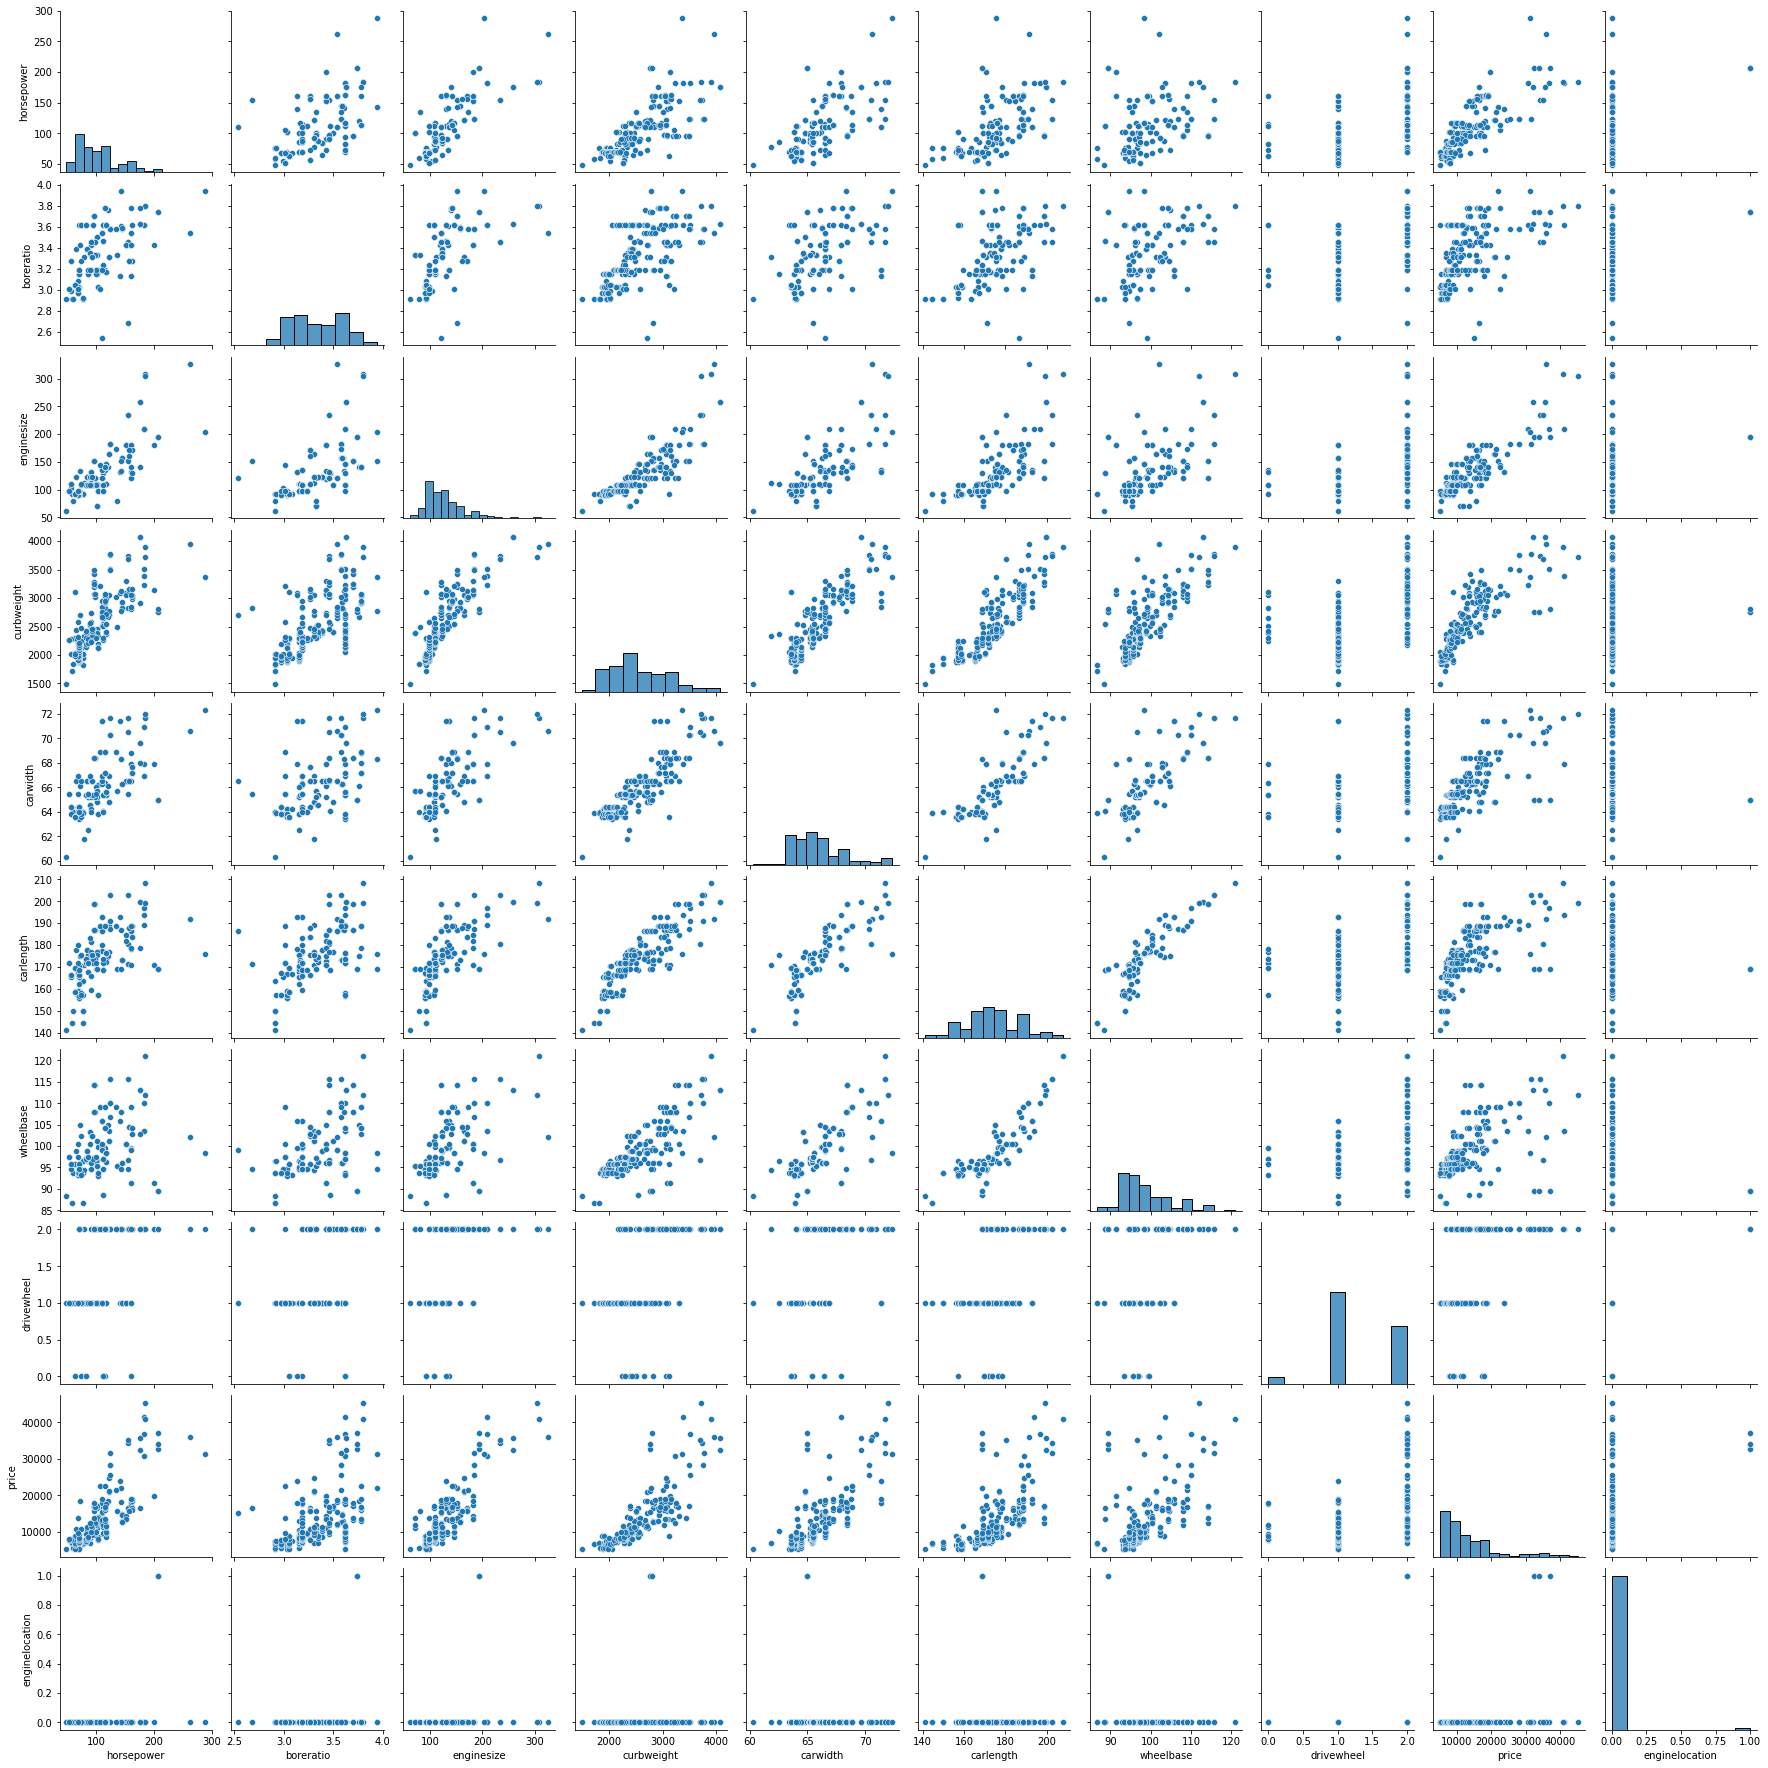

In [ ]:
b=sns.pairplot(data1)
b

In [ ]:
#Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
car_data= scaler.fit_transform(data1)


In [ ]:
# standardized data between (1 to 0)
print("min:",car_data.min(axis=0))
print("max:",car_data.max(axis=0))

min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
data2=pd.DataFrame(car_data,columns=[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','price','enginelocation']])
data2

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,0.262500,0.664286,0.260377,0.411171,0.316667,0.413433,0.058309,1.0,0.207959,0.0
1,0.262500,0.664286,0.260377,0.411171,0.316667,0.413433,0.058309,1.0,0.282558,0.0
2,0.441667,0.100000,0.343396,0.517843,0.433333,0.449254,0.230321,1.0,0.282558,0.0
3,0.225000,0.464286,0.181132,0.329325,0.491667,0.529851,0.384840,0.5,0.219254,0.0
4,0.279167,0.464286,0.283019,0.518231,0.508333,0.529851,0.373178,0.0,0.306142,0.0
...,...,...,...,...,...,...,...,...,...,...
200,0.275000,0.885714,0.301887,0.567882,0.716667,0.711940,0.655977,1.0,0.291123,0.0
201,0.466667,0.885714,0.301887,0.605508,0.708333,0.711940,0.655977,1.0,0.345738,0.0
202,0.358333,0.742857,0.422642,0.591156,0.716667,0.711940,0.655977,1.0,0.406311,0.0
203,0.241667,0.335714,0.316981,0.670675,0.716667,0.711940,0.655977,1.0,0.430763,0.0


In [ ]:
data2.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.233821,0.564111,0.248707,0.414106,0.467317,0.491780,0.354419,0.663415,0.202540,0.014634
std,0.164767,0.193460,0.157142,0.201971,0.178767,0.184139,0.175562,0.278085,0.198323,0.120377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091667,0.435714,0.135849,0.254849,0.316667,0.376119,0.230321,0.500000,0.066283,0.000000
50%,0.195833,0.550000,0.222642,0.359193,0.433333,0.479104,0.303207,0.500000,0.128519,0.000000
75%,0.283333,0.742857,0.301887,0.561288,0.550000,0.626866,0.460641,1.000000,0.282632,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Split Data
X=(data2[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','enginelocation']])
Y=(data2[['price']])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=54)

In [ ]:
X_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
176,0.183333,0.550000,0.230189,0.359193,0.516667,0.514925,0.460641,0.5,0.0
156,0.091667,0.464286,0.139623,0.230023,0.341667,0.376119,0.265306,0.5,0.0
148,0.141667,0.771429,0.177358,0.361521,0.425000,0.485075,0.300292,0.0,0.0
143,0.191667,0.771429,0.177358,0.330489,0.425000,0.461194,0.309038,0.5,0.0
117,0.391667,0.764286,0.275472,0.636928,0.666667,0.680597,0.623907,1.0,0.0
...,...,...,...,...,...,...,...,...,...
23,0.225000,0.350000,0.139623,0.248254,0.291667,0.241791,0.206997,0.5,0.0
15,0.558333,0.771429,0.558491,0.675718,0.550000,0.714925,0.492711,1.0,0.0
130,0.175000,0.657143,0.267925,0.423196,0.516667,0.602985,0.276968,0.5,0.0
69,0.312500,0.742857,0.460377,0.778510,0.833333,0.692537,0.586006,1.0,0.0


In [ ]:
model = Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu',input_shape=(9,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])

In [ ]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.1422 - mae: 0.3566
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1321 - mae: 0.3416
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1266 - mae: 0.3359
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1257 - mae: 0.3360
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1267 - mae: 0.3358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1221 - mae: 0.3289
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1261 - mae: 0.3372
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1255 - mae: 0.3339
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1197 - mae: 0.3268
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1171 - mae: 0.3219
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1215 

In [ ]:
#Prediction
Prediction=model.predict(X_test)
print(Prediction.shape)
print(Prediction)


(62, 1)
[[0.27403677]
 [0.14534542]
 [0.1413548 ]
 [0.28320575]
 [0.21432334]
 [0.64476347]
 [0.17167985]
 [0.1823945 ]
 [0.18263674]
 [0.15547562]
 [0.15467942]
 [0.18271708]
 [0.22753358]
 [0.26834956]
 [0.15911984]
 [0.26111913]
 [0.5574101 ]
 [0.20530748]
 [0.18398732]
 [0.27106452]
 [0.27065587]
 [0.34804714]
 [0.1725274 ]
 [0.18670514]
 [0.18670514]
 [0.3861295 ]
 [0.16659614]
 [0.28443882]
 [0.18220711]
 [0.1548731 ]
 [0.17167985]
 [0.16613725]
 [0.36230582]
 [0.18888462]
 [0.36205614]
 [0.23945487]
 [0.24115384]
 [0.15222186]
 [0.15268993]
 [0.13511255]
 [0.17419532]
 [0.1504108 ]
 [0.1877181 ]
 [0.28443882]
 [0.32119787]
 [0.15115464]
 [0.16153401]
 [0.23282054]
 [0.53908145]
 [0.15942544]
 [0.14651105]
 [0.14467975]
 [0.33260053]
 [0.2390657 ]
 [0.16108835]
 [0.37048745]
 [0.26945016]
 [0.17768061]
 [0.16763481]
 [0.18215853]
 [0.20186132]
 [0.23845842]]
